In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('imdb.csv', error_bad_lines=False)

Skipping line 66: expected 44 fields, saw 46
Skipping line 111: expected 44 fields, saw 45
Skipping line 198: expected 44 fields, saw 45
Skipping line 222: expected 44 fields, saw 46
Skipping line 278: expected 44 fields, saw 45
Skipping line 396: expected 44 fields, saw 45
Skipping line 403: expected 44 fields, saw 45
Skipping line 421: expected 44 fields, saw 45
Skipping line 437: expected 44 fields, saw 45
Skipping line 462: expected 44 fields, saw 46
Skipping line 491: expected 44 fields, saw 45
Skipping line 515: expected 44 fields, saw 45
Skipping line 529: expected 44 fields, saw 45
Skipping line 530: expected 44 fields, saw 45
Skipping line 558: expected 44 fields, saw 45
Skipping line 623: expected 44 fields, saw 45
Skipping line 646: expected 44 fields, saw 45
Skipping line 663: expected 44 fields, saw 46
Skipping line 713: expected 44 fields, saw 45
Skipping line 730: expected 44 fields, saw 47
Skipping line 791: expected 44 fields, saw 45
Skipping line 813: expected 44 fiel

In [3]:
df.head(30)

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
5,titles01/tt0022100,tt0022100,M (1931),m,http://www.imdb.com/title/tt0022100/,8.5,73726.0,7020.0,1931.0,video.movie,...,0,0,0,0,0,0,0,1,0,0
6,titles01/tt0025316,tt0025316,Es geschah in einer Nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/,8.3,46503.0,6300.0,1934.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
7,titles01/tt0027977,tt0027977,Moderne Zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/,8.6,90847.0,5220.0,1936.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
8,titles01/tt0031381,tt0031381,Vom Winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/,8.2,160414.0,14280.0,1939.0,video.movie,...,0,0,1,0,0,0,0,0,1,0
9,titles01/tt0031679,tt0031679,Mr. Smith geht nach Washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/,8.4,58169.0,7740.0,1939.0,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(14332, 44)

In [5]:
df['tid'].value_counts()

tt1512231    1
tt2012155    1
tt2357017    1
tt0080301    1
tt0085794    1
tt0253658    1
tt1618355    1
tt0036940    1
tt0116629    1
tt0091113    1
tt0146882    1
tt0655465    1
tt3176520    1
tt1680051    1
tt1629158    1
tt0185037    1
tt2121065    1
tt1818282    1
tt1818283    1
tt0957658    1
tt0125459    1
tt0023948    1
tt0060161    1
tt0462396    1
tt0117398    1
tt0125454    1
tt1629159    1
tt1336617    1
tt2163063    1
tt0097637    1
            ..
tt0096569    1
tt0066279    1
tt0137437    1
tt0137386    1
tt0071455    1
tt0025929    1
tt1196339    1
tt0240772    1
tt0480941    1
tt0097965    1
tt0203632    1
tt1099212    1
tt0059080    1
tt0064541    1
tt0101188    1
tt2351300    1
tt1182350    1
tt0043686    1
tt0065335    1
tt2011223    1
tt1356417    1
tt1296909    1
tt0469093    1
tt0069467    1
tt0889221    1
tt0257001    1
tt0192917    1
tt1683262    1
tt1868051    1
tt0031433    1
Name: tid, dtype: int64

In [6]:
df = df[df['year'] > 2000]

In [7]:
# df = df[df['SciFi'] == 1]

In [8]:
df.shape

(6706, 44)

In [9]:
df_movie = df[df['type'] != 'video.episode']

In [10]:
df_movie.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
162,titles01/tt0120737,tt0120737,Der Herr der Ringe - Die Gefährten (2001),der herr der ringe die gef hrten,http://www.imdb.com/title/tt0120737/,8.9,871819.0,10680.0,2001.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
167,titles01/tt0167260,tt0167260,Der Herr der Ringe - Die Rückkehr des Königs (...,der herr der ringe die r ckkehr des k nigs,http://www.imdb.com/title/tt0167260/,8.9,845383.0,12060.0,2003.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
168,titles01/tt0167261,tt0167261,Der Herr der Ringe - Die zwei Türme (2002),der herr der ringe die zwei t rme,http://www.imdb.com/title/tt0167261/,8.8,760587.0,10740.0,2002.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
170,titles01/tt0169102,tt0169102,Lagaan: Once Upon a Time in India (2001),lagaan once upon a time in india,http://www.imdb.com/title/tt0169102/,8.3,33481.0,13440.0,2001.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
174,titles01/tt0198781,tt0198781,Die Monster AG (2001),die monster ag,http://www.imdb.com/title/tt0198781/,8.1,374409.0,5520.0,2001.0,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_movie.shape

(5245, 44)

In [12]:
def fill_nan(col):
    df_movie[col] = df_movie[col].fillna(df_movie[col].median())

In [13]:
cols = list(df_movie.columns)
fill_nan(cols)

/home/yash/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
col = list(df_movie.columns)
col.remove('type')
col = col[5:15]
col

['imdbRating',
 'ratingCount',
 'duration',
 'year',
 'nrOfWins',
 'nrOfNominations',
 'nrOfPhotos',
 'nrOfNewsArticles',
 'nrOfUserReviews',
 'nrOfGenre']

In [15]:
sc = StandardScaler()
temp = sc.fit_transform(df_movie[col])
df_movie[col] = temp
df_movie.head()

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/yash/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
162,titles01/tt0120737,tt0120737,Der Herr der Ringe - Die Gefährten (2001),der herr der ringe die gef hrten,http://www.imdb.com/title/tt0120737/,1.919054,10.773801,1.978639,-1.688143,video.movie,...,0,0,0,0,0,0,0,0,0,0
167,titles01/tt0167260,tt0167260,Der Herr der Ringe - Die Rückkehr des Königs (...,der herr der ringe die r ckkehr des k nigs,http://www.imdb.com/title/tt0167260/,1.919054,10.431465,2.534454,-1.133414,video.movie,...,0,0,0,0,0,0,0,0,0,0
168,titles01/tt0167261,tt0167261,Der Herr der Ringe - Die zwei Türme (2002),der herr der ringe die zwei t rme,http://www.imdb.com/title/tt0167261/,1.831357,9.333386,2.002805,-1.410778,video.movie,...,0,0,0,0,0,0,0,0,0,0
170,titles01/tt0169102,tt0169102,Lagaan: Once Upon a Time in India (2001),lagaan once upon a time in india,http://www.imdb.com/title/tt0169102/,1.392871,-0.082380,3.090269,-1.688143,video.movie,...,0,0,0,0,0,0,0,0,0,0
174,titles01/tt0198781,tt0198781,Die Monster AG (2001),die monster ag,http://www.imdb.com/title/tt0198781/,1.217477,4.332517,-0.099626,-1.688143,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_standard = df_movie[list(df_movie.describe().columns)]
df_standard.head()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
162,1.919054,10.773801,1.978639,-1.688143,7.273615,5.070189,1.887842,0.175706,15.453062,0.883308,...,0,0,0,0,0,0,0,0,0,0
167,1.919054,10.431465,2.534454,-1.133414,11.019763,4.094810,1.991310,0.484257,9.362720,0.883308,...,0,0,0,0,0,0,0,0,0,0
168,1.831357,9.333386,2.002805,-1.410778,6.711693,4.643461,1.308426,0.004220,7.197554,0.883308,...,0,0,0,0,0,0,0,0,0,0
170,1.392871,-0.082380,3.090269,-1.688143,3.714775,0.741948,-0.191847,-0.319978,0.219104,0.883308,...,0,0,0,0,0,0,0,0,0,0
174,1.217477,4.332517,-0.099626,-1.688143,0.905164,1.473481,1.204959,-0.260521,1.249827,0.883308,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pca = PCA(n_components=3)
pca.fit(df_standard)
df_pca = pca.transform(df_standard)

In [18]:
df_pca

array([[ 17.15809808,  -6.63725682,  -2.93135561],
       [ 15.8975257 ,  -4.35122439,  -4.19434365],
       [ 12.63598033,  -3.81399307,  -3.24798516],
       ..., 
       [ -1.29675302,  -1.5967977 ,   1.11038724],
       [ -0.8086777 ,   1.02176109,  -1.30072503],
       [ -0.78287   ,  -0.69578739,   0.97563769]])

In [19]:
pca.explained_variance_ratio_

array([ 0.30419755,  0.11203657,  0.0954276 ])

In [20]:
df_standard['pca_one'] = df_pca[:, 0]
df_standard['pca_two'] = df_pca[:, 1]
df_standard['pca_three'] = df_pca[:, 2]

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [21]:
df_standard.shape, df_movie.shape

((5245, 41), (5245, 44))

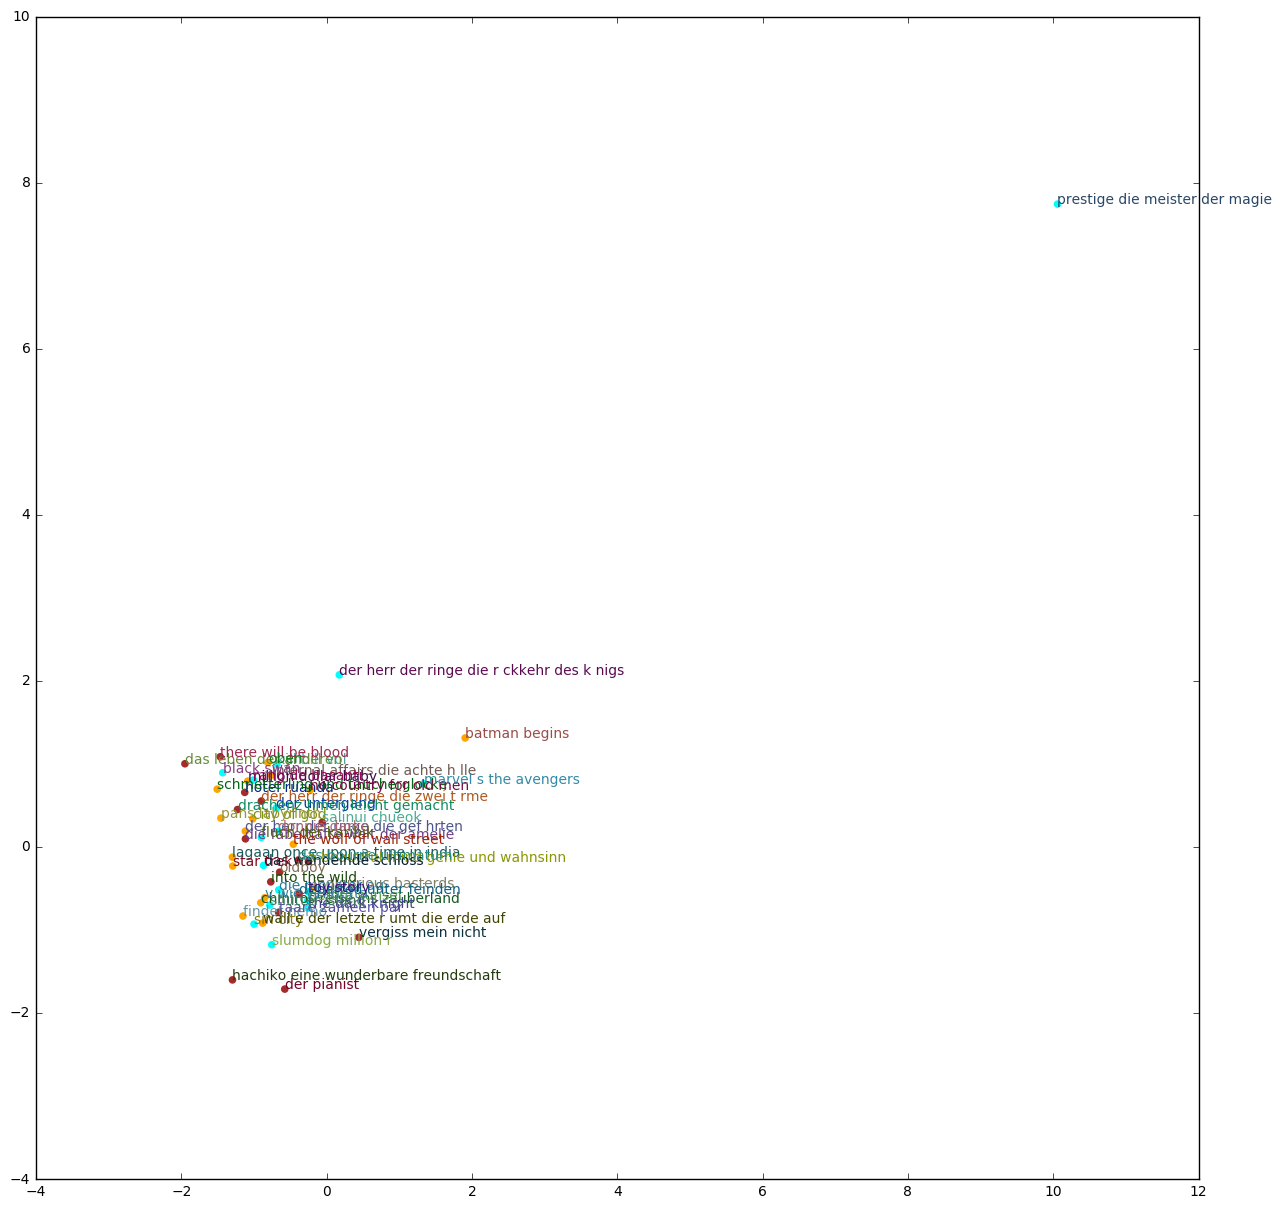

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(df_standard['pca_one'][-50:], df_standard['pca_two'][-50:], color=['orange', 'cyan', 'brown'])
for m, p1, p2 in zip(df_movie['wordsInTitle'], df_standard['pca_one'][-50:], df_standard['pca_two'][-50:]):
    plt.text(p1, p2, s=m, 
             color=np.random.rand(3)*0.7)